# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Loading Dataset

In [ ]:
df_train=pd.read_csv("C:\\Users\\Sahil\\Desktop\\CodSoft\\Datasets\\Credit Card Transactions Fraud Detection\\fraudTrain.csv")
df_test=pd.read_csv("C:\\Users\\Sahil\\Desktop\\CodSoft\\Datasets\\Credit Card Transactions Fraud Detection\\fraudTest.csv")

**TRAIN DATA**

In [ ]:
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
df_train.shape

(1296675, 23)

In [ ]:
df_train.size

29823525

In [ ]:
df_train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [ ]:
df_train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
df_train.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [ ]:
df_train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
df_train['gender'].value_counts()

F    709863
M    586812
Name: gender, dtype: int64

**ENCODING TRAIN DATA**

In [ ]:
encoder=LabelEncoder()
def encode(data):
    data['merchant']=encoder.fit_transform(data['merchant'])
    data["category"] = encoder.fit_transform(data["category"])
    data["gender"] = encoder.fit_transform(data["gender"])
    data["job"] = encoder.fit_transform(data["job"])
    return data

In [ ]:
encode(df_train)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,514,8,4.97,Jennifer,Banks,0,561 Perry Cove,...,36.0788,-81.1781,3495,370,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,241,4,107.23,Stephanie,Gill,0,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,428,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,390,0,220.11,Edward,Sanchez,1,594 White Dale Suite 530,...,42.1808,-112.2620,4154,307,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,360,2,45.00,Jeremy,White,1,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,328,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,297,9,41.96,Tyler,Garcia,1,408 Bradley Rest,...,38.4207,-79.4629,99,116,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,499,0,15.56,Erik,Patterson,1,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,215,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,2,1,51.70,Jeffrey,White,1,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,360,1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,599,1,105.93,Christopher,Castaneda,1,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,308,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,509,1,74.90,Joseph,Murray,1,42933 Ryan Underpass,...,43.3526,-102.5411,1126,485,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


**TEST DATA**

In [ ]:
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
df_test.shape

(555719, 23)

In [ ]:
df_test.size

12781537

In [ ]:
df_test.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df_test.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [ ]:
df_test.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [ ]:
df_test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
df_test['gender'].value_counts()

F    304886
M    250833
Name: gender, dtype: int64

**ENCODING TEST DATA**

In [ ]:
#Converting categorical values into numerical values
encoder=LabelEncoder()
def encode(data):
    data['merchant']=encoder.fit_transform(data['merchant'])
    data["category"] = encoder.fit_transform(data["category"])
    data["gender"] = encoder.fit_transform(data["gender"])
    data["job"] = encoder.fit_transform(data["job"])
    return data

In [ ]:
encode(df_test)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,319,10,2.86,Jeff,Elliott,1,351 Darlene Green,...,33.9659,-80.9355,333497,275,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,591,10,29.84,Joanne,Williams,0,3638 Marsh Union,...,40.3207,-110.4360,302,392,1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,611,5,41.28,Ashley,Lopez,0,9333 Valentine Point,...,40.6729,-73.5365,34496,259,1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,222,9,60.05,Brian,Williams,1,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,407,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,292,13,3.19,Nathan,Massey,1,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,196,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,507,5,43.77,Michael,Olson,1,558 Michael Estates,...,40.4931,-91.8912,519,460,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,264,7,111.84,Jose,Vasquez,1,572 Davis Mountains,...,29.0393,-95.4401,28739,198,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,496,7,86.88,Ann,Lawson,0,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,294,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,75,13,7.99,Eric,Preston,1,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,58,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


# EDA

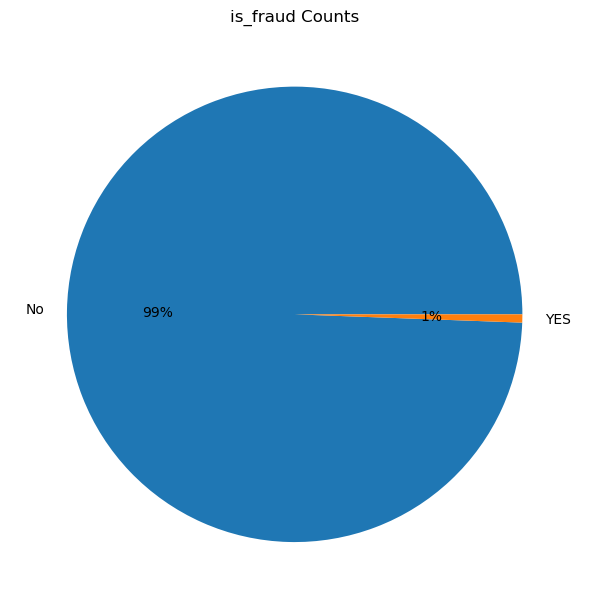

In [ ]:
#Pie chart displaying distinct values in 'is_fraud' column
exit_counts = df_train["is_fraud"].value_counts()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(exit_counts, labels=["No", "YES"], autopct="%0.0f%%")
plt.title("is_fraud Counts")
plt.tight_layout()
plt.show()

# Data Cleaning

In [ ]:
#Dropping uneccessary columns
def clean_data(clean):
     clean.drop(["Unnamed: 0",'cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],axis=1, inplace=True)
     clean.dropna()
     return clean

In [ ]:
clean_data(df_train)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,514,8,4.97,0,36.0788,-81.1781,3495,370,1325376018,36.011293,-82.048315,0
1,241,4,107.23,0,48.8878,-118.2105,149,428,1325376044,49.159047,-118.186462,0
2,390,0,220.11,1,42.1808,-112.2620,4154,307,1325376051,43.150704,-112.154481,0
3,360,2,45.00,1,46.2306,-112.1138,1939,328,1325376076,47.034331,-112.561071,0
4,297,9,41.96,1,38.4207,-79.4629,99,116,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,499,0,15.56,1,37.7175,-112.4777,258,215,1371816728,36.841266,-111.690765,0
1296671,2,1,51.70,1,39.2667,-77.5101,100,360,1371816739,38.906881,-78.246528,0
1296672,599,1,105.93,1,32.9396,-105.8189,899,308,1371816752,33.619513,-105.130529,0
1296673,509,1,74.90,1,43.3526,-102.5411,1126,485,1371816816,42.788940,-103.241160,0


In [ ]:
clean_data(df_test)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,319,10,2.86,1,33.9659,-80.9355,333497,275,1371816865,33.986391,-81.200714,0
1,591,10,29.84,0,40.3207,-110.4360,302,392,1371816873,39.450498,-109.960431,0
2,611,5,41.28,0,40.6729,-73.5365,34496,259,1371816893,40.495810,-74.196111,0
3,222,9,60.05,1,28.5697,-80.8191,54767,407,1371816915,28.812398,-80.883061,0
4,292,13,3.19,1,44.2529,-85.0170,1126,196,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...
555714,507,5,43.77,1,40.4931,-91.8912,519,460,1388534347,39.946837,-91.333331,0
555715,264,7,111.84,1,29.0393,-95.4401,28739,198,1388534349,29.661049,-96.186633,0
555716,496,7,86.88,0,46.1966,-118.9017,3684,294,1388534355,46.658340,-119.715054,0
555717,75,13,7.99,1,44.6255,-116.4493,129,58,1388534364,44.470525,-117.080888,0


# Training & Testing

In [ ]:
#Seperating the data for training & testing
x=df_train.drop(columns=['is_fraud'])
y=df_train['is_fraud']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.head()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long
330201,340,13,6.51,0,30.6576,-91.6264,1178,99,1338993811,31.189017,-91.426377
798518,476,0,20.17,0,48.3400,-122.3456,85,390,1354562808,47.373663,-122.739095
1260375,571,5,35.85,0,32.3836,-94.8653,24536,300,1370692963,31.989881,-95.371119
412511,357,3,42.21,1,44.8605,-85.8138,3096,423,1341539214,45.377530,-86.450595
344644,197,7,57.24,0,41.5378,-88.0572,128354,452,1339371240,42.372906,-87.112752


In [ ]:
y_train.head()

330201     0
798518     0
1260375    0
412511     0
344644     0
Name: is_fraud, dtype: int64

In [ ]:
x_test.head()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long
1045211,629,9,194.51,1,40.6153,-79.4545,972,378,1362841766,40.420453,-78.865012
547406,180,5,52.32,0,42.8250,-124.4409,217,400,1345650541,42.758860,-123.636337
110142,429,12,6.53,0,39.9636,-79.7853,184,444,1330824856,40.475159,-78.898190
1285953,187,6,7.33,1,42.9580,-77.3083,10717,115,1371413078,43.767506,-76.542384
271705,92,2,64.29,0,41.6423,-104.1974,635,358,1336974888,41.040392,-104.092324


In [ ]:
y_test.head()

1045211    0
547406     0
110142     0
1285953    0
271705     0
Name: is_fraud, dtype: int64

# Logistic Regression

In [ ]:
model1 = LogisticRegression()
def acc_score(test, pred):
    acc_ = accuracy_score(test, pred)
    return acc_
def print_score(test, pred, model):
    print(f"Classifier: {model}")
    print(f"Accuracy: {accuracy_score(test, pred)}")

In [ ]:
model1.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=model1.predict(x_test)

In [ ]:
print_score(y_test, y_pred, "Logistic")

Classifier: Logistic
Accuracy: 0.9941388551487458


# Random Forest

In [ ]:
model2 = RandomForestClassifier()
model_list = []
acc_list = []
model_list.append(model1.__class__.__name__)
acc_list.append(round(acc_score(y_test, y_pred), 4))

In [ ]:
model2.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred1=model2.predict(x_test)

In [ ]:
print_score(y_test,y_pred1,"RandomForest")

Classifier: RandomForest
Accuracy: 0.9974357491275763


# Decision Tree

In [ ]:
model3 = DecisionTreeClassifier()
model_list.append(model2.__class__.__name__)
acc_list.append(round(acc_score(y_test, y_pred), 4))

In [ ]:
model3.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred2=model3.predict(x_test)

In [ ]:
print_score(y_test, y_pred2, "DecisionTree")

Classifier: DecisionTree
Accuracy: 0.9958933425877726


In [ ]:
model_list.append(model3.__class__.__name__)
acc_list.append(round(acc_score(y_test, y_pred2), 3))

# Comparing all the models

In [ ]:
model_results = pd.DataFrame({"Model": model_list,
                              "Accuracy_Score": acc_list,
                              })
model_results

,Model,Accuracy_Score
0,LogisticRegression,0.9941
1,RandomForestClassifier,0.9941
2,DecisionTreeClassifier,0.9960


In [ ]:
X_test = df_test.drop(columns=["is_fraud"], inplace = False)
Y_test = df_test["is_fraud"]

In [ ]:
y_pred2 = model2.predict(X_test)
y_pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
accuracy_score(y_pred2,df_test['is_fraud'])

0.997480741165949

**Hence we can conclude that the transactions shown in the dataset are *legitimate (not fraudulent)* with model's accuracy scores given below\
Logistic Regression model : 99.41% \
Random Forest Classifier model : 99.41%\
Decision Tree Classifier model : 99.60%**